# Homework12: Intro to Machine Learning

### 1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course.

Machine learning (ML) is helpful when trying to find causal relationships, glean meaningful patterns about your data and/or when making predictions. These objectives are typically achieved through either supervised or unsupervised ML. 

Knowing whether to use ML as opposed to other strategies depends on 1) what data you have available and 2) what questions you are trying to answer. A basic non-machine learning question might be, “how did our sales this month compare to our sales last month?” To determine that, we could simply find the total sales for the current month and calculate the difference from the previous month. In other words, ML is not needed when simply describing a data set. One can plot a basic distribution of data, compute descriptive statistics (e.g. mean, median, mode, IQR), and even find correlations between variables without utilizing ML techniques. 

Sometimes, we want to answer questions that cannot be determined through mere descriptive statistics. This is when we utilize ML. For example, a question that requires ML might be, “Can the characteristics of a customer predict how much they will purchase from us next year?” To answer this, we would need to utilize the data we have in order to predict the future. That could be through a regression (supervised learning). An additional question might be, “Can we identify patterns in our customers, based on their purchasing habits?” This question would utilize an unsupervised ML technique to answer. 

In sum, if a business question is descriptive in nature and can be answered without building any models, then it is not machine learning. If a business question is predictive, seeks to find causality, and/or wants to ascertain patterns, then machine learning models/techniques are needed. 

### 2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.

Examples of possible pre-processing steps:
1. Cleaning up null values
2. Data cleaning (dashes, odd characters, etc)
3. Handle missing data
4. Remove extreme outliers
5. One-Hot encoding
6. Convert Categorical values to numerical (sometimes that is the same as 3)
7. Standardization/Normalization
8. Deal with multicollinearity (can be caused by 3)

In [18]:
# Import libraries
import pandas as pd

# File to Load
loans = "loans_full_schema.csv"

# Read File and store into Pandas data frame
loans = pd.read_csv(loans)
loans_df = pd.DataFrame(loans)

# View data frame
print(str(len(loans_df.index))+' rows and 55 features')
loans_df.head()

10000 rows and 55 features


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [2]:
# Check column names and data types of each column
loans_df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [3]:
# Examine basic descriptive statistics for each variable
loans_df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


**1. Clean up null values**

In [4]:
# First, check which variables have null values
loans_df.isnull().sum()

# Nulls include:
### emp_title                            833 object
### emp_length                           817 float64
### debt_to_income                        24 float64
### annual_income_joint                 8505 float64
### verification_income_joint           8545 object
### debt_to_income_joint                8505 float64
### months_since_last_delinq            5658 float64
### months_since_90d_late               7715 float64
### months_since_last_credit_inquiry    1271 float64
### num_accounts_120d_past_due           318 float

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [5]:
# Create a list to organize all of the variables that have null values
null_list = ['emp_title','emp_length','debt_to_income','annual_income_joint','verification_income_joint',
            'debt_to_income_joint','months_since_last_delinq','months_since_90d_late',
             'months_since_last_credit_inquiry','num_accounts_120d_past_due']

# Iterate through the list to see the percentage of values that are null
for variable in null_list:
    Percent_null = round((loans_df[variable].isnull().sum()/10000)*100,2)
    print(variable + ' = ' + str(Percent_null)+'%')

emp_title = 8.33%
emp_length = 8.17%
debt_to_income = 0.24%
annual_income_joint = 85.05%
verification_income_joint = 85.45%
debt_to_income_joint = 85.05%
months_since_last_delinq = 56.58%
months_since_90d_late = 77.15%
months_since_last_credit_inquiry = 12.71%
num_accounts_120d_past_due = 3.18%


The above analysis displays that annual_income_joint, verification_income_joint, debt_to_income_joint, months_since_last_delinq, and months_since_90d_late all have over half of their values as null. Because of this, I have determined that any results from these variables would not be very accurate, nor reliable. Therefore, it is safe to eliminate these variables during the pre-processing steps. 

In [19]:
# Remove the variables that have over 50% null values. 
loans2 = loans_df.drop(['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 
                        'months_since_last_delinq', 'months_since_90d_late'],axis=1)

# View new df to confirm (only 50 columns now)
loans2.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


**2. Handle missing data**

Now that we have removed the variables with >50% null values, we can clean up the missing data that remains in the other variables:
- emp_title
- emp_length
- debt_to_income
- months_since_last_credit_inquiry
- num_accounts_120d_past_due

In [26]:
import statistics as st

# First, fix employee title variable
loans2["emp_title"].fillna("Unknown", inplace = True)

# For the rest of the variables, fill with the median value of that variable
median_list = ['emp_length','debt_to_income','months_since_last_credit_inquiry','num_accounts_120d_past_due']

for var in median_list:
    loans2[var].fillna(st.median(loans2[var]), inplace=True)

In [27]:
# Verify that NAs have been filled
loans2.isna().sum() # Confirmed that NAs are now gone from the data set!

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc

**3. Convert Categorical values to numerical**

Now that we have cleaned nulls and have handled missing data, we can convert the remaining categorical values to numerical. This is necessary for machine learning algorithms, so it is an important step of pre-processing our data.

In [37]:
Categorical = []

# Iterate through the loans2 data frame
for col, value in loans2.iteritems():
    # Search for all columns that have an "object" type ('O')
    if loans2[col].dtype == 'O':
        # Append col names to the empty list
        Categorical.append(col)
        
# Print list to verify
print(Categorical)

['emp_title', 'state', 'homeownership', 'verified_income', 'loan_purpose', 'application_type', 'grade', 'sub_grade', 'issue_month', 'loan_status', 'initial_listing_status', 'disbursement_method']


In [41]:
# Create new data frame with only the categorical values, so that we can easily see them all together
cat_df = loans2[Categorical]
cat_df.head()

,emp_title,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,global config engineer,NJ,MORTGAGE,Verified,moving,individual,C,C3,Mar-2018,Current,whole,Cash
1,warehouse office clerk,HI,RENT,Not Verified,debt_consolidation,individual,C,C1,Feb-2018,Current,whole,Cash
2,assembly,WI,RENT,Source Verified,other,individual,D,D1,Feb-2018,Current,fractional,Cash
3,customer service,PA,RENT,Not Verified,debt_consolidation,individual,A,A3,Jan-2018,Current,whole,Cash
4,security supervisor,CA,RENT,Verified,credit_card,joint,C,C3,Mar-2018,Current,whole,Cash


In [50]:
# Print the unique values of every column so that we can see what we are working with
for col, val in cat_df.iteritems():
    print(cat_df[col].unique())

['global config engineer ' 'warehouse office clerk' 'assembly' ...
 'inspector/packer' 'da coordinator ' 'toolmaker']
['NJ' 'HI' 'WI' 'PA' 'CA' 'KY' 'MI' 'AZ' 'NV' 'IL' 'FL' 'SC' 'CO' 'TN'
 'TX' 'VA' 'NY' 'GA' 'MO' 'AR' 'MD' 'NC' 'NE' 'WV' 'NH' 'UT' 'DE' 'MA'
 'OR' 'OH' 'OK' 'SD' 'MN' 'AL' 'WY' 'LA' 'IN' 'KS' 'MS' 'WA' 'ME' 'VT'
 'CT' 'NM' 'AK' 'MT' 'RI' 'ND' 'DC' 'ID']
['MORTGAGE' 'RENT' 'OWN']
['Verified' 'Not Verified' 'Source Verified']
['moving' 'debt_consolidation' 'other' 'credit_card' 'home_improvement'
 'medical' 'house' 'small_business' 'car' 'major_purchase' 'vacation'
 'renewable_energy']
['individual' 'joint']
['C' 'D' 'A' 'B' 'F' 'E' 'G']
['C3' 'C1' 'D1' 'A3' 'C2' 'B5' 'C4' 'B2' 'B1' 'D3' 'F1' 'E5' 'A2' 'A5'
 'A4' 'A1' 'D4' 'D5' 'B3' 'D2' 'E1' 'G1' 'B4' 'C5' 'E2' 'E4' 'F3' 'E3'
 'F5' 'F2' 'F4' 'G4']
['Mar-2018' 'Feb-2018' 'Jan-2018']
['Current' 'Fully Paid' 'In Grace Period' 'Late (31-120 days)'
 'Charged Off' 'Late (16-30 days)']
['whole' 'fractional']
['Cash' 'DirectPay

In [79]:
import numpy as np
# Go back to full data frame, and convert some of these variables using 'factorize'

# emp_title (come back to later)



# state
# Factorize state, sort alphabetically, and add 1, so that we don't have any zeros
loans2['state_code'] = pd.factorize(loans2['state'], sort=True)[0] + 1



# homeownership
# Replace 'mortgage' with 'own', since they mean the same thing. That way, we only have two variables (own, rent)
loans2['homeownership'] = np.where(loans2['homeownership']=='MORTGAGE','OWN',loans2['homeownership'])
# verify it works
loans2['homeownership'].unique()
# Factorize homeownership through new variable
loans2['homeownership_code'] = pd.factorize(loans2['homeownership'], sort=True)[0] + 1



# verified_income
# Replace 'source_verified' with 'verified'
loans2['verified_income'] = np.where(loans2['verified_income']=='Source Verified','Verified',loans2['verified_income'])
# verify it works
loans2['verified_income'].unique()
# Factorize verified_income through new variables
loans2['verified_income_code'] = pd.factorize(loans2['verified_income'], sort=True)[0] + 1


# loan_purpose
# Factorize the loan_purpose variable (no additional cleaning needed)
loans2['loan_purpose_code'] = pd.factorize(loans2['loan_purpose'])[0] + 1


# application_type
# Recode to numerical (only two value types)
loans2['application_type_code'] = np.where(loans2['application_type']=='individual',1,2)


# grade
# Factorize variable (no additional cleaning needed)
loans2['grade_code'] = pd.factorize(loans2['grade'], sort=True)[0] + 1


# sub_grade
# Factorize the same way as the above variable (grade)
loans2['sub_grade_code'] = pd.factorize(loans2['sub_grade'], sort = True)[0] + 1


# issue_month
# Unique values include: ['Mar-2018' 'Feb-2018' 'Jan-2018']
# Because it is all the same year, we can just code 1=Jan, 2=Feb, and 3=Mar
loans2['issue_month_code'] = loans2['issue_month'].replace({'Jan-2018':1, 'Feb-2018':2, 'Mar-2018':3})
# verify it worked
loans2[['issue_month', 'issue_month_code']].head()


# loan_status
# Factorize variable (no additional cleaning needed)
loans2['loan_status_code'] = pd.factorize(loans2['loan_status'])[0] + 1



# initial_listing_status
# Recode to numerical (only two value types)
loans2['initial_listing_status_code'] = np.where(loans2['initial_listing_status']=='whole',1,2)



# disbursement_method
# Recode to numerical (only two value types)
loans2['disbursement_method_code'] = np.where(loans2['disbursement_method']=='Cash',1,2)

loans2.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,homeownership_code,verified_income_code,loan_purpose_code,application_type_code,grade_code,sub_grade_code,issue_month_code,loan_status_code,initial_listing_status_code,disbursement_method_code
0,global config engineer,3.0,NJ,OWN,90000.0,Verified,18.01,0,2001,6,...,1,2,1,1,3,13,3,1,1,1
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,...,2,1,2,1,3,11,2,1,1,1
2,assembly,3.0,WI,RENT,40000.0,Verified,21.15,0,2006,4,...,2,2,3,1,4,16,2,1,2,1
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,...,2,1,2,1,1,3,1,1,1,1
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,...,2,2,4,2,3,13,3,1,1,1


In [167]:
# Now that we have added a 'code' for every categorical variable, we can drop all of the original categorical vars
# Create new df with only numeric; drop vars from 'Categorical' list created earlier
loans_num = loans2.drop(Categorical, axis=1)
# View first few rows to confirm
loans_num.head()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,homeownership_code,verified_income_code,loan_purpose_code,application_type_code,grade_code,sub_grade_code,issue_month_code,loan_status_code,initial_listing_status_code,disbursement_method_code
0,3.0,90000.0,18.01,0,2001,6,28,10,70795,38767,...,1,2,1,1,3,13,3,1,1,1
1,10.0,40000.0,5.04,0,1996,1,30,14,28800,4321,...,2,1,2,1,3,11,2,1,1,1
2,3.0,40000.0,21.15,0,2006,4,31,10,24193,16000,...,2,2,3,1,4,16,2,1,2,1
3,1.0,30000.0,10.16,0,2007,0,4,4,25400,4997,...,2,1,2,1,1,3,1,1,1,1
4,10.0,35000.0,57.96,0,2008,7,22,16,69839,52722,...,2,2,4,2,3,13,3,1,1,1


### 3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

For the following correlation matrix, I decided to analyze just a subset of variables. If I were to run a regression to predict whether someone will be able to pay of their loans, I would first develop a hypothesis. Before running the model, I would first need to verify that my regression assumptions are met. One assumption for regression is to have no multicollinearity between predictor variables. A method for checking this is to run a correlation matrix. That being said, my list of potentially predictive variables include:
1. annual_income 
2. debt_to_income
3. total_debit_limit
4. total_credit_utilized
5. current_accounts_delinq
6. account_never_delinq_percent
7. loan_amount
8. paid_principal
9. paid_interest
10. paid_total

In [170]:
# First create data frame that only contains our desired variables
loans_small = loans_num[['annual_income','debt_to_income','total_debit_limit','total_credit_utilized',
                        'current_accounts_delinq','account_never_delinq_percent','loan_amount','paid_principal',
                        'paid_interest','paid_total']]
# View smaller data frame
loans_small.head()

,annual_income,debt_to_income,total_debit_limit,total_credit_utilized,current_accounts_delinq,account_never_delinq_percent,loan_amount,paid_principal,paid_interest,paid_total
0,90000.0,18.01,11100,38767,0,92.9,28000,984.14,1015.19,1999.33
1,40000.0,5.04,16500,4321,0,100.0,5000,348.63,150.49,499.12
2,40000.0,21.15,4300,16000,0,93.5,2000,175.37,106.43,281.80
3,30000.0,10.16,19400,4997,0,100.0,21600,2746.74,566.15,3312.89
4,35000.0,57.96,32700,52722,0,100.0,23000,1569.85,754.80,2324.65


We could easily run a correlation matrix on the selected variables. Before plotting, however, I would first like to remove the "perfect correlations," as that is just a variable correlated with itself. That information is not useful. I will also remove the duplicate correlations to make the plot easier for us to read. This will create a triangle effect, where half of the matrix is displayed. 

In [204]:
import warnings
warnings.filterwarnings('ignore')

# First get the correlations from our data frame
# I am taking the absolute value because for the purposes of gaining insight from a correlation matrix, and knowing
   ### which variables won't work in our model, the direction of the correlation is not very important. 
   ### what we care about is the magnitude of the correlation. 
   ### Additionally, this will make the resulting heat map much easier to read so that strong negative correlations are 
    ### represented visually the same as strong positive correlations
loans_corr = abs(loans_small.corr())

# Reading function from inside out...
        # Get the shape of loans_corr (it is a 10x10 matrix)
        # Use np.ones to replace all values with ones in the same shape as loans_corr (10,10 matrix)
        # Wrap inside np.triu, in order to create an upper triangle of the matrix
                # Upper diagonal of matrix are now 1s and lower diagonal of matrix are zeros
        # Create boolean where 1s are 'true' and 0s are 'false' (this is needed for mask function in next step)
        # mask the resulting array to be the same shape/type as the original loans_corr
                # We are only maintaining the values, where the boolean would be 'false'
loans_corr_tri = loans_corr.mask(np.triu(np.ones(loans_corr.shape)).astype(np.bool))
loans_corr_tri

# Now, we no longer have the duplicates!

,annual_income,debt_to_income,total_debit_limit,total_credit_utilized,current_accounts_delinq,account_never_delinq_percent,loan_amount,paid_principal,paid_interest,paid_total
annual_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
debt_to_income,0.187414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_debit_limit,0.328861,0.060592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_credit_utilized,0.406370,0.232287,0.291753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current_accounts_delinq,0.001665,0.007168,0.005028,0.006782,NaN,NaN,NaN,NaN,NaN,NaN
account_never_delinq_percent,0.010542,0.075064,0.217834,0.064098,0.014910,NaN,NaN,NaN,NaN,NaN
loan_amount,0.324665,0.056926,0.319198,0.236893,0.001590,0.080014,NaN,NaN,NaN,NaN
paid_principal,0.141893,0.020130,0.116208,0.079426,0.002268,0.022761,0.275470,NaN,NaN,NaN
paid_interest,0.174154,0.120294,0.089857,0.181088,0.010833,0.002847,0.721582,0.077493,NaN,NaN
paid_total,0.162005,0.004037,0.125776,0.101605,0.000810,0.022711,0.364641,0.991473,0.20675,NaN


In [205]:
# Drop the first row and the last column, since those are only NAs
loans_corr_tri = loans_corr_tri.drop(index='annual_income', columns='paid_total')
loans_corr_tri.head(10)

,annual_income,debt_to_income,total_debit_limit,total_credit_utilized,current_accounts_delinq,account_never_delinq_percent,loan_amount,paid_principal,paid_interest
debt_to_income,0.187414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_debit_limit,0.328861,0.060592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_credit_utilized,0.406370,0.232287,0.291753,NaN,NaN,NaN,NaN,NaN,NaN
current_accounts_delinq,0.001665,0.007168,0.005028,0.006782,NaN,NaN,NaN,NaN,NaN
account_never_delinq_percent,0.010542,0.075064,0.217834,0.064098,0.014910,NaN,NaN,NaN,NaN
loan_amount,0.324665,0.056926,0.319198,0.236893,0.001590,0.080014,NaN,NaN,NaN
paid_principal,0.141893,0.020130,0.116208,0.079426,0.002268,0.022761,0.275470,NaN,NaN
paid_interest,0.174154,0.120294,0.089857,0.181088,0.010833,0.002847,0.721582,0.077493,NaN
paid_total,0.162005,0.004037,0.125776,0.101605,0.000810,0.022711,0.364641,0.991473,0.20675


Now that we have our final variables of interest, and now that the data are modified the way we want, we can finally start plotting the matrix!

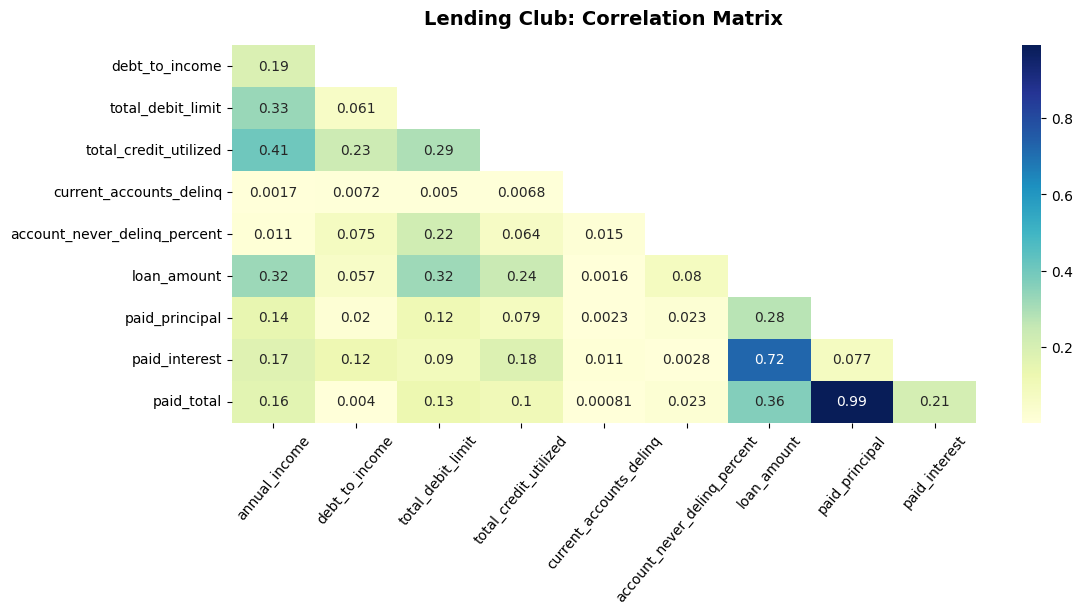

In [216]:
# load necessary libraries for visualization
import seaborn as sn
import matplotlib.pyplot as plt

# Visually display the matrix from above
# use the yellow-green-blue color map so that high correlations are more easily identifiable
h = sn.heatmap(loans_corr_tri, annot=True,
              cmap="YlGnBu")

# Add plot title 
h.set_title('Lending Club: Correlation Matrix', size=14, weight='bold', pad=15)

plt.xticks(rotation=50)

# Make plots larger
plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})

plt.show()

**Summary of my Findings:**

I was surprised to learn that most of the variables that I selected have lower correlations with each other. There are some exceptions to that, of course. The plot displays that the amount of the principal paid ("paid_principal") has nearly a perfect correlation with the total amount of the loan paid ("paid_total"). This makes a lot of sense, given that the principal amount would be a large chunk of the total loan. Another high correlation was the total loan amount with the amount of interest paid. This also makes sense, as the higher the loan, the more interest someone would have accrued. 

A good rule of thumb is to not include predictors in a model that have a correlation with each other of +/- 0.7 or higher. The only two pairs that meet that are the ones described above (paid_principal with paid_total) and (loan_amount with paid_interest). However, I would still also be wary of placing both 'annual_income' and 'total_credit_utilized' in a model together, as that correlation is still reasonably high (0.41). Otherwise, I believe all other pairs would be safe to place in a regression model, when it comes to meeting assumptions of no multicollinearity among predictors.

### 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.

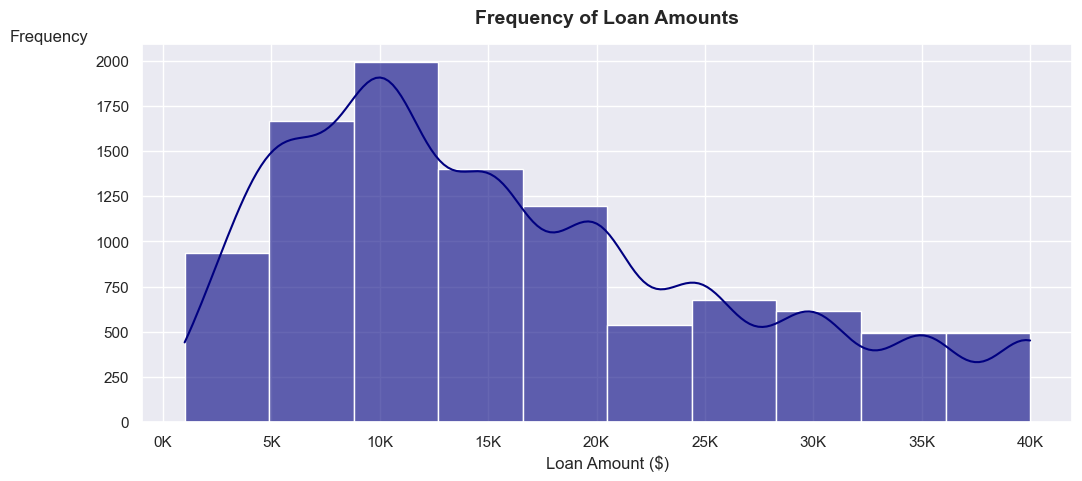

In [56]:
import warnings
warnings.filterwarnings('ignore')

# Set the style
sns.set(style="darkgrid") 

# Create the histogram
g = sns.histplot(x='loan_amount',
                 bins=10,
                 color='navy',
                 alpha=0.6,
                 kde=True, # add kernal density line to smooth out variation when looking at distribution
                 data=loans_df)

# Create value for xlabels to make them easier to read
# Change format to be values in K amounts (divide the value by 1000)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
# Set the xticks to be edited values
g.set_xticklabels(xlabels)
# Add x-axis label
g.set_xlabel('Loan Amount ($)', size=12)

# Adjust the y-axis label to be horizontal 
g.set_ylabel('Frequency', size=12, rotation='horizontal') 
# Add label to the top, so that it is easier to read
g.yaxis.set_label_coords(-0.1,1)

# Add plot title 
g.set_title('Frequency of Loan Amounts', size=14, weight='bold', pad=15)

# Make plots larger
plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})

plt.show()

**Explanation:** The histogram above displays a right-skewed distribution. This indicates that a higher concentration of individuals request smaller loans. Most loans are between $\$10,000$ and $\$15,000$. In general, as the loan amount increases, the frequency of people requesting that loan *decreases.*

I selected a bin size of '10' because this value allowed me to more clearly see the positively skewed distribution. I experimented with bin sizes ranging from 5 to 50. A bin size of 5 is too small to see the distribution. However, bin sizes greater than 10 also clouded the overall distribution. This could be due to the nature of this variable. For example, loans are often selected in larger amounts, rather than granular dollar amounts.

In [55]:
loans_df['loan_amount'].describe()

count    10000.000000
mean     16361.922500
std      10301.956759
min       1000.000000
25%       8000.000000
50%      14500.000000
75%      24000.000000
max      40000.000000
Name: loan_amount, dtype: float64

### 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

In [2]:
# My function to convert states into regions
def state_to_region(s):
    
    # List of pacific states
    Pacific = ['WA','OR','ID','CA','NV','UT','AZ','AK', 'HI']
    # List of plains states
    Plains = ['MT','SD','ND','WY','NE','CO','KS','NM','TX','OK']
    # List of midwest states
    Midwest = ['MN','WI','MI','IA','MO','IL','IN','OH','KY']
    # List of northeast states
    Northeast = ['ME','VT','NH','MA','RI','CT','NY','NJ','PA','DE','MD','WV','VA']
    # List of southern states
    South = ['AR','TN','NC','LA','MS','AL','GA','FL', 'SC']    
    
    # series of if else statements to check if a state is in one of the lists
    # return the correct region, if true
    if (s in Pacific):
        return 'Pacific'
    elif (s in Plains):
        return 'Plains'
    elif (s in Midwest):
        return 'Midwest'
    elif (s in Northeast):
        return 'Northeast'
    else:
        return 'South'

# test function
state_to_region('SD')

'Plains'

In [3]:
# Apply my created function to lambda
loans_df['region'] = loans_df.apply(lambda x: state_to_region(x['state']), axis=1)
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific


**a. Is there a better way to do this than with a lambda?** 

There is likely a better method to use, rather than lambda. This is likely because we are not needing to utilize it with a higher-order function, such as map, filter, or reduce. It does not seem to be a situation where lambda works best.

**b. Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown.** 

I decided to use a lambda (above) and a different technique (below). I was curious to know whether it would be faster to call my created function within a lambda, or to call it without the lambda (see code below).

After completing the code, I tested the two functions to see which performed better. I saw that the non-lambda way was much more efficient. The timer displayed 0.26 for the lambda way, but only 0.02 for the non-lambda way. That is a pretty big difference!

In [4]:
# Use a non-lambda way
loans_df['region2'] = loans_df['state'].apply(state_to_region)
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region,region2
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific,Pacific


In [5]:
# Test to see which method was faster!

import time # to use the timer function

# Lambda way
start_time1 = time.perf_counter()
loans_df.apply(lambda x: state_to_region(x['state']), axis=1)
end_time1 = time.perf_counter()

# See the total time it takes to run the function
total_time1 = end_time1-start_time1
print('Lambda way: ' + str(round(total_time1,2)))


# Other way
start_time2 = time.perf_counter()
loans_df['state'].apply(state_to_region)
end_time2 = time.perf_counter()

# See the total time it takes to run the function
total_time2 = end_time2-start_time2
print('Other way: ' + str(round(total_time2,2)))

Lambda way: 0.26
Other way: 0.02


## 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

In [6]:
# Filter the data sets by Region for plots below
Pacific = loans_df[loans_df['region']=='Pacific']
Plains = loans_df[loans_df['region']=='Plains']
Midwest = loans_df[loans_df['region']=='Midwest']
Northeast = loans_df[loans_df['region']=='Northeast']
South = loans_df[loans_df['region']=='South']

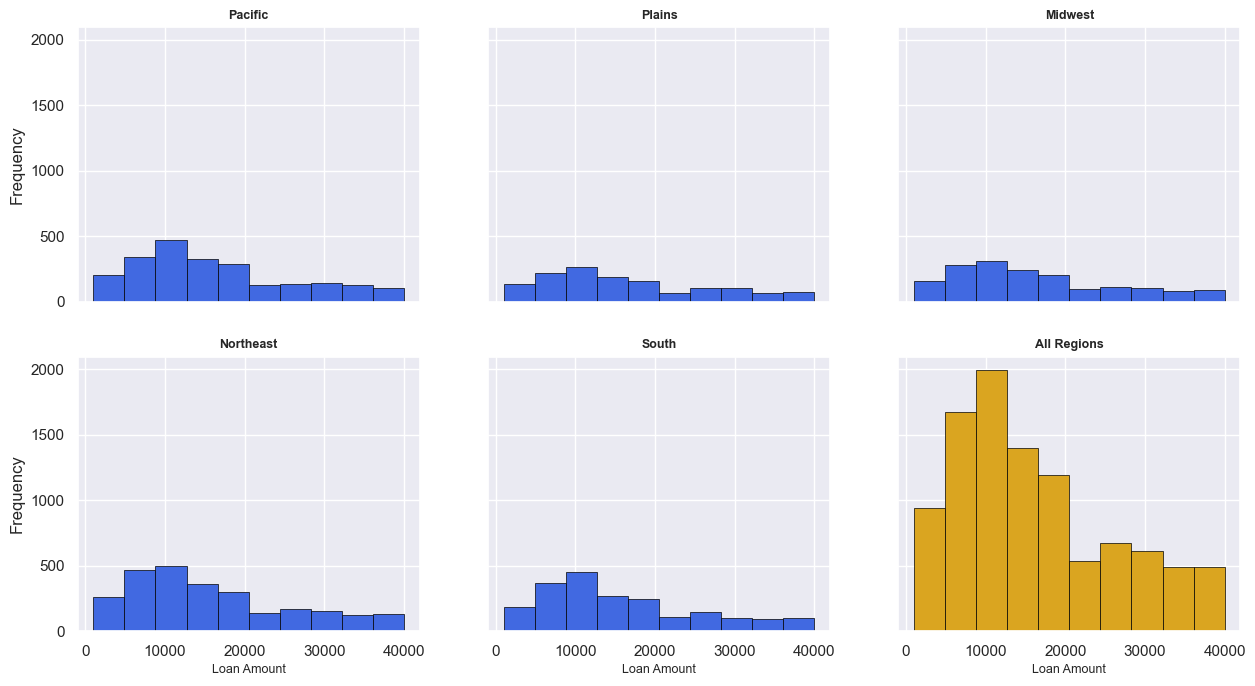

In [13]:
# load necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="darkgrid") 

# Set up axes for subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,8))

# Pacific on first axis
ax1.hist(Pacific['loan_amount'], bins=10, color='royalblue', edgecolor='black', linewidth=0.5)
ax1.set_title('Pacific', size=9, weight='bold')
ax1.set_ylabel('Frequency')

# Plains on second axis
ax2.hist(Plains['loan_amount'], bins=10, color='royalblue', edgecolor='black', linewidth=0.5)
ax2.set_title('Plains', size=9, weight='bold')

# Midwest on third axis
ax3.hist(Midwest['loan_amount'], bins=10, color='royalblue', edgecolor='black', linewidth=0.5)
ax3.set_title('Midwest', size=9, weight='bold')

# Northeast on fourth axis
ax4.hist(Northeast['loan_amount'], bins=10, color='royalblue', edgecolor='black', linewidth=0.5)
ax4.set_title('Northeast', size=9, weight='bold')
ax4.set_xlabel('Loan Amount', size=9)
ax4.set_ylabel('Frequency')

# South on fifth axis
ax5.hist(South['loan_amount'], bins=10, color='royalblue', edgecolor='black', linewidth=0.5)
ax5.set_title('South', size=9, weight='bold')
ax5.set_xlabel('Loan Amount', size=9)

# All together on sixth axis
ax6.hist(loans_df['loan_amount'], bins=10, color='goldenrod', edgecolor='black', linewidth=0.5)
ax6.set_title('All Regions', size=9, weight='bold')
ax6.set_xlabel('Loan Amount', size=9)

# Make plots larger
plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})

**Summary of Findings:** In general, the distributions do not vary that much by region. All regions have a positively skewed distribution. However, the plains region follows a uniform distribution more closely, when compared to other regions. The Pacific and Northeast regions have the sharpest skew, with most people requesting a smaller loan amount.

### 7.	Think of some questions you want to ask our guests next week. You can ask them anything, just make sure its thoughtful.

1. What types of training (degrees, 'bootcamps,' 'work experience,' 'online courses,' etc.) best prepared you for your current roles? 
2. Which math courses would be most helpful to take, if interested in a data science career? 
3. For Brittany: Which skills from LaunchCode do you use most often in your work? 
4. How demanding is a data science career (in terms of work-life balance)?

## Data Camp Certificates

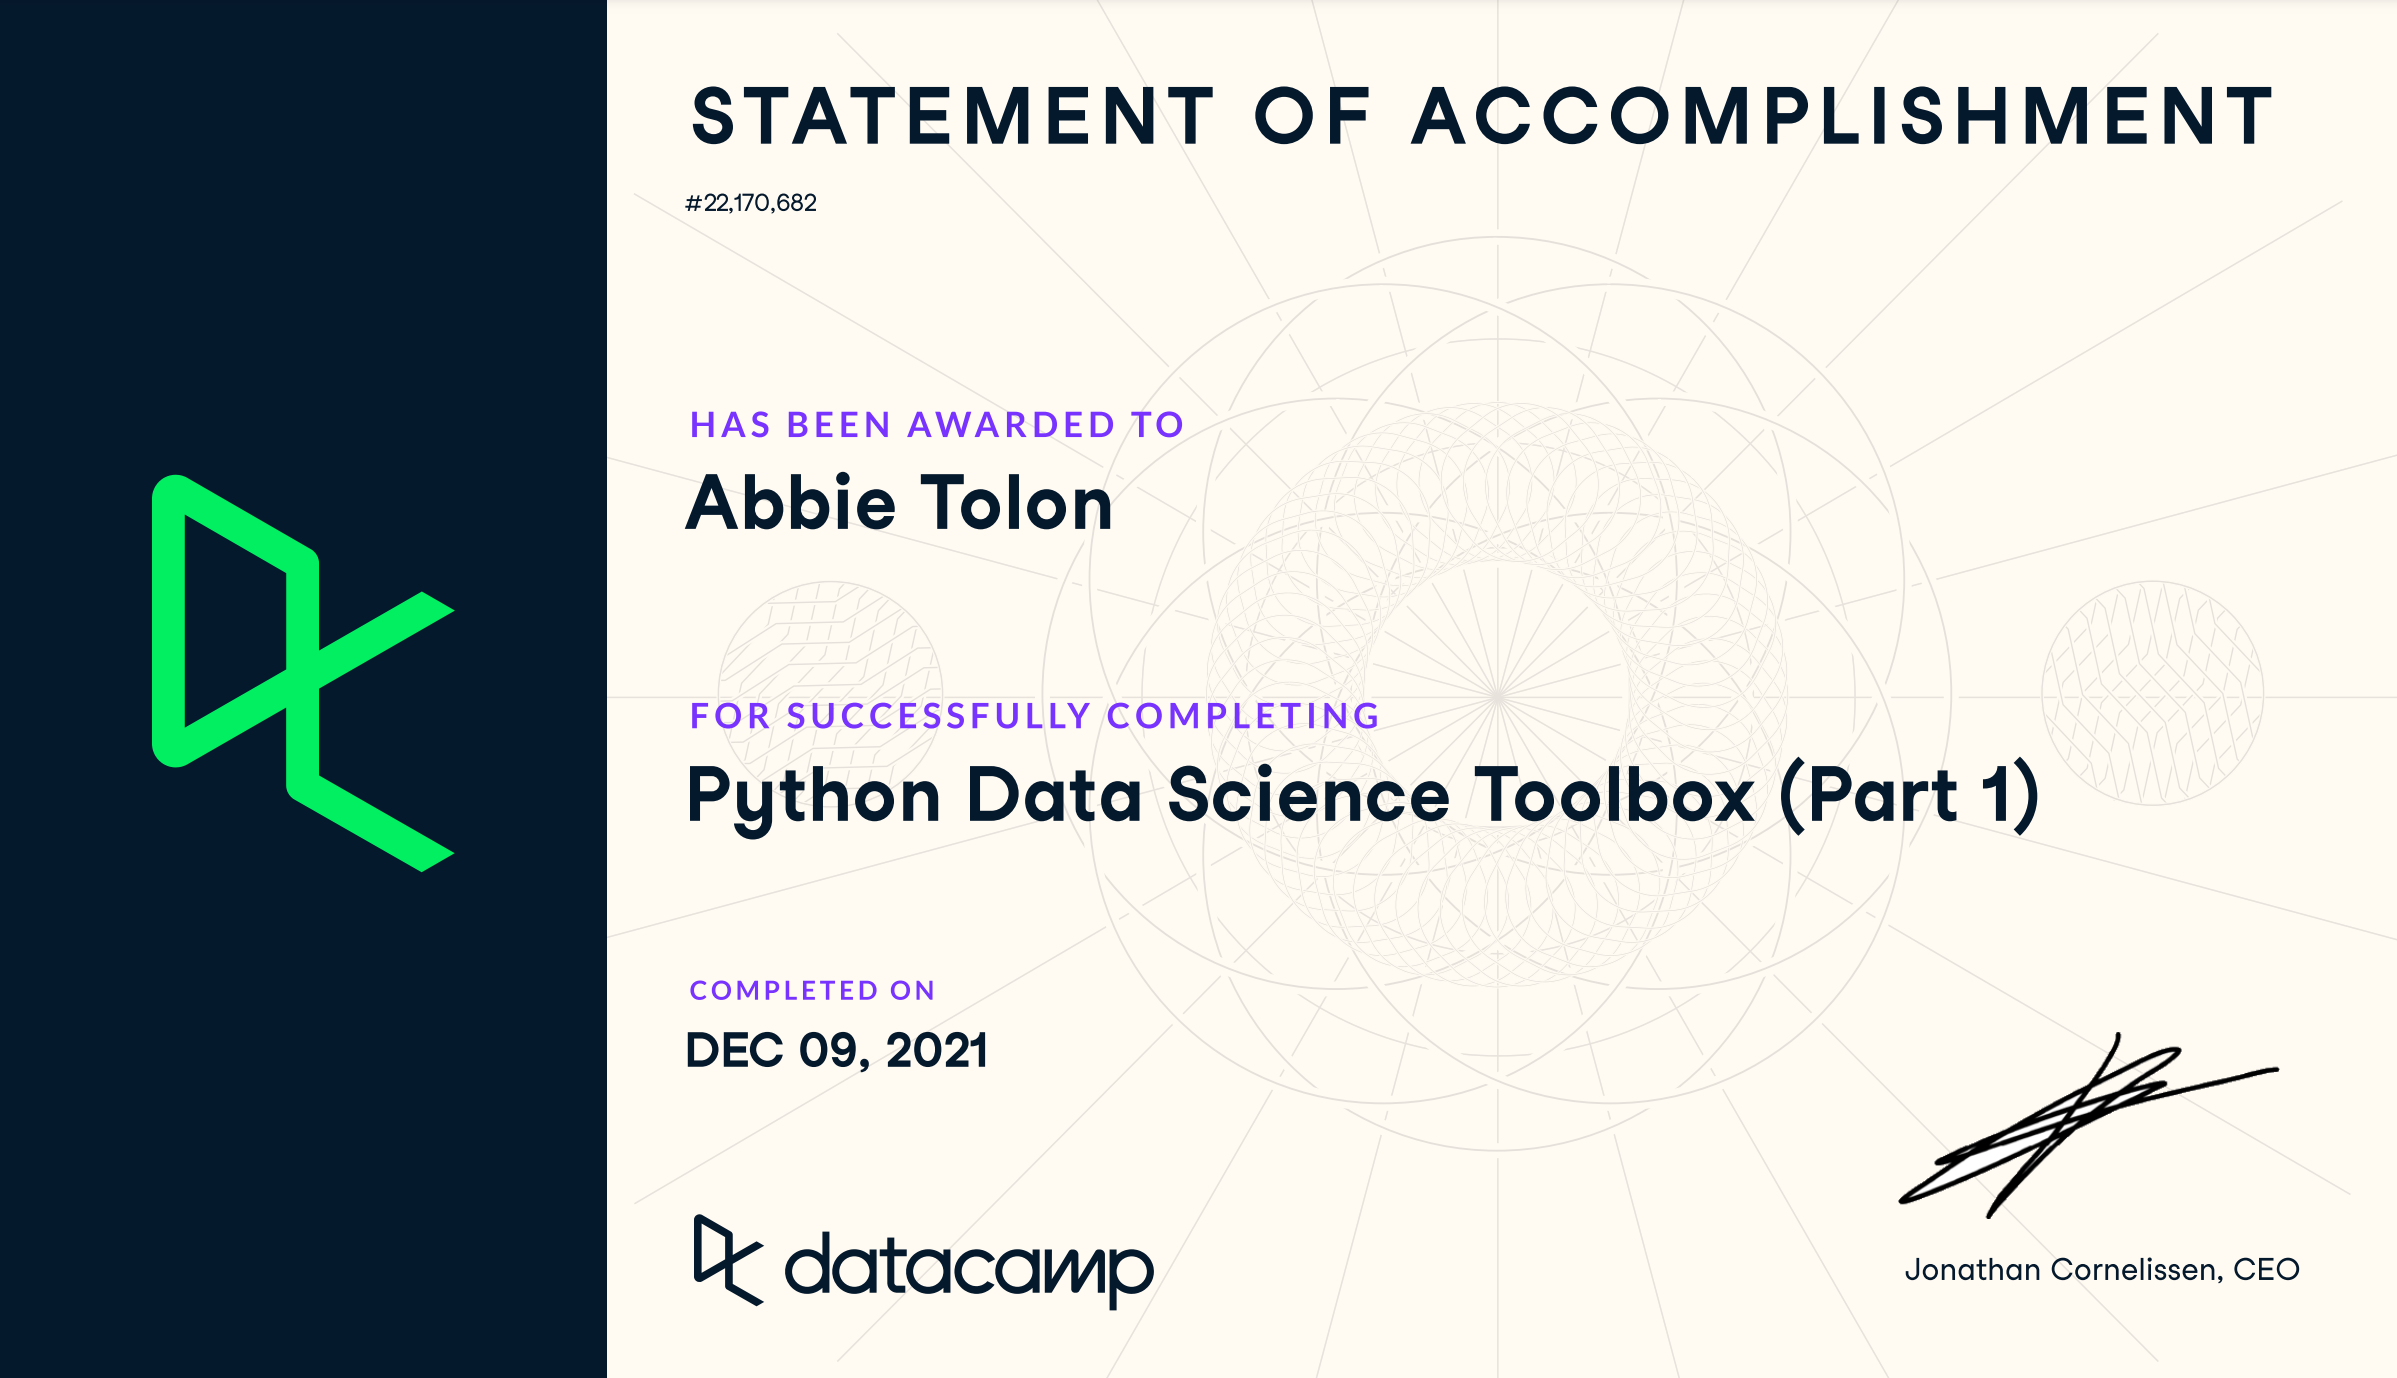